In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Load + Exploratory Analysis

In [2]:
people = pd.read_csv('LahmanData2023\core\People.csv')
salary = pd.read_csv('LahmanData2023\contrib\Salaries.csv')
batting = pd.read_csv('LahmanData2023\core\Batting.csv')
teams = pd.read_csv('LahmanData2023\core\Teams.csv')

In [3]:
people.keys()

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [4]:
salary.keys()

Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')

In [5]:
player_seasons = people.merge(salary,on='playerID').drop(
    columns=['deathYear','deathMonth', 'deathDay','deathCountry', 'deathState', 'deathCity'])

In [6]:
#get unique dictionary of team to franchise IDs to merge into following dataframes
franch_IDs = []
for team in teams['teamID'].unique():
    franch_IDs.append(teams[teams['teamID'] == team]['franchID'].iloc(0)[0])

franchises = pd.DataFrame(list(zip(teams['teamID'].unique(),franch_IDs)), columns=['teamID','franchID'])

In [7]:
player_seasons = player_seasons.merge(batting.drop(columns = ['teamID','lgID']), on=["playerID",'yearID']).merge(franchises, on='teamID')

In [8]:
player_seasons.head(10)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,nameGiven,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,David Allan,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,SFG
1,abreuto01,1984.0,11.0,13.0,D.R.,Puerto Plata,Puerto Plata,Tony,Abreu,Etanislao Toni,...,0.0,2.0,6,33.0,1.0,1.0,1.0,1.0,5.0,SFG
2,abreuto01,1984.0,11.0,13.0,D.R.,Puerto Plata,Puerto Plata,Tony,Abreu,Etanislao Toni,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,SFG
3,accarje01,1981.0,12.0,18.0,USA,AZ,Phoenix,Jeremy,Accardo,Jeremiah Lee,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,SFG
4,accarje01,1981.0,12.0,18.0,USA,AZ,Phoenix,Jeremy,Accardo,Jeremiah Lee,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,SFG
5,adriaeh01,1989.0,8.0,21.0,Venezuela,Miranda,Guarenas,Ehire,Adrianza,Ehire Enrique,...,1.0,1.0,5,22.0,1.0,1.0,2.0,1.0,2.0,SFG
6,adriaeh01,1989.0,8.0,21.0,Venezuela,Miranda,Guarenas,Ehire,Adrianza,Ehire Enrique,...,0.0,1.0,2,13.0,0.0,2.0,4.0,0.0,0.0,SFG
7,affelje01,1979.0,6.0,6.0,USA,AZ,Phoenix,Jeremy,Affeldt,Jeremy David,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,SFG
8,affelje01,1979.0,6.0,6.0,USA,AZ,Phoenix,Jeremy,Affeldt,Jeremy David,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,SFG
9,affelje01,1979.0,6.0,6.0,USA,AZ,Phoenix,Jeremy,Affeldt,Jeremy David,...,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,SFG


In [9]:
player_seasons['playerID'].unique()

array(['aardsda01', 'abreuto01', 'accarje01', ..., 'watsobr01',
       'wilsojo03', 'zimmery01'], dtype=object)

In [10]:
len(player_seasons['playerID'].unique())

5005

In [11]:
len(people['playerID'].unique())

20676

In [12]:
teams[teams.columns[2:4]]

,teamID,franchID
0,BS1,BNA
1,CH1,CNA
2,CL1,CFC
3,FW1,KEK
4,NY2,NNA
...,...,...
3010,SLN,STL
3011,TBA,TBD
3012,TEX,TEX
3013,TOR,TOR


In [13]:
batting_nosalary = batting[batting['playerID'].isin(people[~people['playerID'].isin(player_seasons['playerID'].unique())]['playerID'].unique())].merge(franchises, on='teamID')
batting_nosalary

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,TRO
1,beaveed01,1871,1,TRO,NaN,3,15,7,6,0,...,2.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,TRO
2,bellast01,1871,1,TRO,NaN,29,128,26,32,3,...,4.0,4.0,9,2.0,NaN,NaN,NaN,NaN,2.0,TRO
3,connone01,1871,1,TRO,NaN,7,33,6,7,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,TRO
4,cravebi01,1871,1,TRO,NaN,27,118,26,38,8,...,6.0,3.0,3,0.0,NaN,NaN,NaN,NaN,3.0,TRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,sulseco01,2022,1,MIA,NL,39,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,FLA
67184,wendljo01,2022,1,MIA,NL,101,347,27,90,24,...,12.0,3.0,15,50.0,0.0,5.0,1.0,3.0,7.0,FLA
67185,willilu01,2022,2,MIA,NL,71,115,20,27,4,...,11.0,4.0,9,40.0,1.0,0.0,0.0,0.0,1.0,FLA
67186,yacabji01,2022,1,MIA,NL,9,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,FLA


In [14]:
batting_nosalary = batting_nosalary[batting_nosalary['yearID'] >= min(player_seasons['yearID'])]
batting_nosalary = batting_nosalary[batting_nosalary['yearID'] <= max(player_seasons['yearID'])]
print(batting_nosalary.head(1))
print(batting_nosalary.tail(1))

       playerID  yearID  stint teamID lgID  G  AB  R  H  2B  ...   SB   CS  \
4036  abregjo01    1985      1    CHN   NL  6   9  0  0   0  ...  0.0  0.0   

      BB   SO  IBB  HBP   SH   SF  GIDP  franchID  
4036   0  2.0  0.0  0.0  0.0  0.0   0.0       CHC  

[1 rows x 23 columns]
        playerID  yearID  stint teamID lgID   G  AB  R  H  2B  ...   SB   CS  \
66953  wittgni01    2016      1    MIA   NL  48   0  0  0   0  ...  0.0  0.0   

       BB   SO  IBB  HBP   SH   SF  GIDP  franchID  
66953   0  0.0  0.0  0.0  0.0  0.0   0.0       FLA  

[1 rows x 23 columns]


In [15]:
player_seasons.keys()

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'nameFirst', 'nameLast', 'nameGiven',
       'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID',
       'bbrefID', 'yearID', 'teamID', 'lgID', 'salary', 'stint', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'franchID'],
      dtype='object')

In [16]:
games_by_year_nosalary = batting_nosalary.groupby(by='yearID').sum()['G']
games_by_year_salary = player_seasons.groupby(by='yearID').sum()['G']

games_by_team_nosalary = batting_nosalary.groupby(by='franchID').sum()['G']
games_by_team_salary = player_seasons.groupby(by='franchID').sum()['G']

In [17]:
games_by_year_nosalary.values

array([3510, 1422, 1430, 1164,  676,  676, 1144,  788, 1063,  346,  448,
        553,  499,  461,  626, 1143, 1089, 1306, 1869, 1565, 1452, 1555,
       1424, 2082, 1801, 1583, 2166, 2068, 2066, 2387, 4234, 8792],
      dtype=int64)

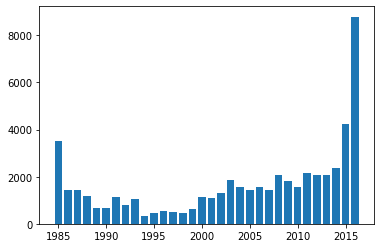

In [18]:
plt.bar(games_by_year_nosalary.keys(),games_by_year_nosalary.values);

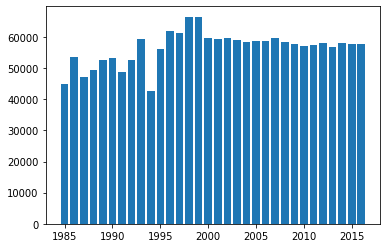

In [19]:
plt.bar(games_by_year_salary.keys(),games_by_year_salary.values);

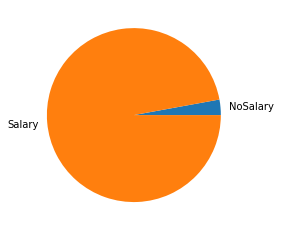

In [20]:
plt.pie([sum(games_by_year_nosalary),sum(games_by_year_salary)], labels=['NoSalary','Salary']);

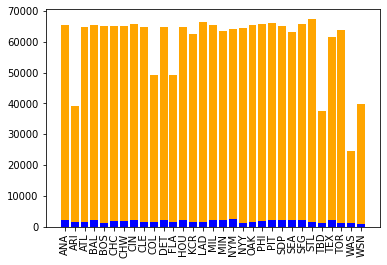

In [23]:
y_offset = np.zeros(len(games_by_team_nosalary.keys()))
colors= ['blue','orange']

for i,a in enumerate([games_by_team_nosalary,games_by_team_salary]):

    plt.bar(games_by_team_nosalary.keys(),a.values, bottom=y_offset, color = colors[i])
    y_offset = y_offset + a.values

plt.xticks(rotation=90);

In [25]:
games_by_year_team_salary = player_seasons.groupby(by=['yearID','franchID']).agg({'G':'sum'}).reset_index()

In [46]:
games_by_year_team_salary

,yearID,franchID,G
0,1985,ANA,2012
1,1985,ATL,1897
2,1985,BAL,1835
3,1985,BOS,1903
4,1985,CHC,1808
...,...,...,...
913,2016,STL,2176
914,2016,TBD,1873
915,2016,TEX,1730
916,2016,TOR,2094


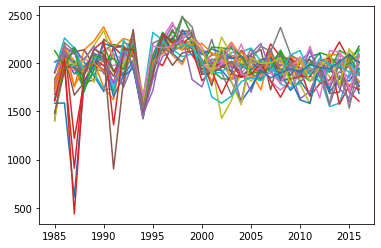

In [50]:
for key in games_by_year_team_salary['franchID'].unique():
    x = games_by_year_team_salary[games_by_year_team_salary['franchID'] == key]['yearID']
    y = games_by_year_team_salary[games_by_year_team_salary['franchID'] == key]['G']

    plt.plot(x,y)

